**Importing necessary libraries**

In [1]:
#Warnings except for future warnings
import warnings
warnings.simplefilter('ignore', FutureWarning)

#Data Manipulation
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

#Data Visualization
%matplotlib inline

**Importing Data**

In [2]:
#importing data for the analysis

data = pd.read_csv('/content/data.csv', encoding="ISO-8859-1")

In [3]:
#displaying columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
#Obtaining a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
#Given that the 'Description' and 'Customer ID' columns have missing entries, we can determine the exact number of missing values using the isnull function.

In [6]:
#Counting the missing values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#Due to the large number of missing values, we should remove them to ensure our analysis is accurate
data = data.dropna()
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
# Generating a descriptive statistics summary
data.describe().round()

,Quantity,UnitPrice,CustomerID
count,406829.0,406829.0,406829.0
mean,12.0,3.0,15288.0
std,249.0,69.0,1714.0
min,-80995.0,0.0,12346.0
25%,2.0,1.0,13953.0
50%,5.0,2.0,15152.0
75%,12.0,4.0,16791.0
max,80995.0,38970.0,18287.0


## **Answering some key questions to know the dataset better**

**1) Profit Made**

In [9]:
#Getting the total for each row
data_unitPrice = data['UnitPrice']
data_quantity = data['Quantity']
total = data_unitPrice * data_quantity
data['Total'] = total
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [10]:
#Since there are negative values in the 'Quantity' column, we should verify whether the total amounts are also negative.

In [11]:
# Query the columns with a negative value in the 'Quantity' column to check if the totals are also negative
negativeQuantity = data.fillna(0).query('Quantity < 0')
negativeQuantity.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96


In [12]:
#this either indicates the orders were cancelled or returned

#now calculating the profits

#Getting the total profit
data['Total'].sum()

8300065.814000001

**2) Revenue generated every Month**

In [13]:
# Before we start calculating monthly sales revenue, we need to address the 'InvoiceDate' column.
# To facilitate the tracking and sorting of specific dates, we should convert its data type to datetime64.

In [14]:
# Convert the 'InvoiceDate' column to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Optionally, display the converted 'InvoiceDate' column to verify the change
# This is useful especially when running in an interactive environment like Jupyter Notebook
print(data['InvoiceDate'].head())


0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


In [15]:
# creating YearMonth feature to simplify reporting and visualization
data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100*date.year + date.month).astype('category')
# calculate Revenue for each row
data ['Revenue'] = data['UnitPrice'] * data['Quantity']

In [16]:
from datetime import datetime

# List of tuples representing month names, the number of the month, the last day of the month, and the year
months = [
    ('Dec2010', 12, 31, 2010),
    ('Jan2011', 1, 31, 2011),
    ('Feb2011', 2, 28, 2011),
    ('Mar2011', 3, 31, 2011),
    ('Apr2011', 4, 30, 2011),
    ('May2011', 5, 31, 2011),
    ('Jun2011', 6, 30, 2011),
    ('Jul2011', 7, 31, 2011),
    ('Aug2011', 8, 31, 2011),
    ('Sep2011', 9, 30, 2011),
    ('Oct2011', 10, 31, 2011),
    ('Nov2011', 11, 30, 2011),
    ('Dec2011', 12, 31, 2011)
]

# Using globals() for dynamically creating variable names (not recommended for production code)
for month, month_num, end_day, year in months:
    start_date = datetime(year, month_num, 1)
    end_date = datetime(year, month_num, end_day)
    globals()[month] = data.loc[(data['InvoiceDate'] >= start_date) & (data['InvoiceDate'] <= end_date)]

In [17]:
from datetime import datetime
import pandas as pd

# Define the range of months with corresponding start and end dates
months = [
    ('December 2010', datetime(2010, 12, 1), datetime(2010, 12, 31)),
    ('January 2011', datetime(2011, 1, 1), datetime(2011, 1, 31)),
    ('February 2011', datetime(2011, 2, 1), datetime(2011, 2, 28)),
    ('March 2011', datetime(2011, 3, 1), datetime(2011, 3, 31)),
    ('April 2011', datetime(2011, 4, 1), datetime(2011, 4, 30)),
    ('May 2011', datetime(2011, 5, 1), datetime(2011, 5, 31)),
    ('June 2011', datetime(2011, 6, 1), datetime(2011, 6, 30)),
    ('July 2011', datetime(2011, 7, 1), datetime(2011, 7, 31)),
    ('August 2011', datetime(2011, 8, 1), datetime(2011, 8, 31)),
    ('September 2011', datetime(2011, 9, 1), datetime(2011, 9, 30)),
    ('October 2011', datetime(2011, 10, 1), datetime(2011, 10, 31)),
    ('November 2011', datetime(2011, 11, 1), datetime(2011, 11, 30)),
    ('December 2011', datetime(2011, 12, 1), datetime(2011, 12, 31))
]

# Create a DataFrame to store the results
monthly_revenues = pd.DataFrame(columns=["Month", "Total Revenue"])

# Calculate total revenue for each month
for month_name, start_date, end_date in months:
    # Filter data within the date range
    monthly_data = data.loc[(data['InvoiceDate'] >= start_date) & (data['InvoiceDate'] <= end_date)]
    # Sum up the 'Revenue' for the filtered data
    total_revenue = monthly_data['Revenue'].sum()
    # Append the result to the DataFrame using pd.concat
    monthly_revenues = pd.concat([monthly_revenues, pd.DataFrame({"Month": [month_name], "Total Revenue": [total_revenue]})], ignore_index=True)

# Display the DataFrame with monthly revenue totals
print(monthly_revenues)


             Month  Total Revenue
0    December 2010     554604.020
1     January 2011     457532.010
2    February 2011     421441.080
3       March 2011     557607.820
4       April 2011     426047.851
5         May 2011     630802.530
6        June 2011     567232.880
7        July 2011     540849.441
8      August 2011     605089.330
9   September 2011     891771.142
10    October 2011     942321.110
11   November 2011    1091886.890
12   December 2011     342506.380


In [18]:
monthly_revenues


,Month,Total Revenue
0,December 2010,554604.020
1,January 2011,457532.010
2,February 2011,421441.080
3,March 2011,557607.820
4,April 2011,426047.851
5,May 2011,630802.530
6,June 2011,567232.880
7,July 2011,540849.441
8,August 2011,605089.330
9,September 2011,891771.142


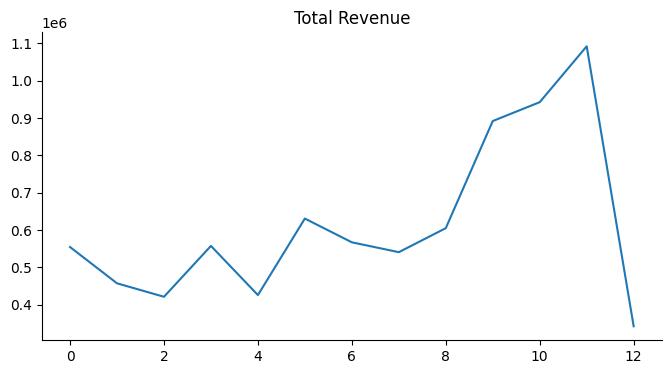

In [19]:
from matplotlib import pyplot as plt
monthly_revenues['Total Revenue'].plot(kind='line', figsize=(8, 4), title='Total Revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

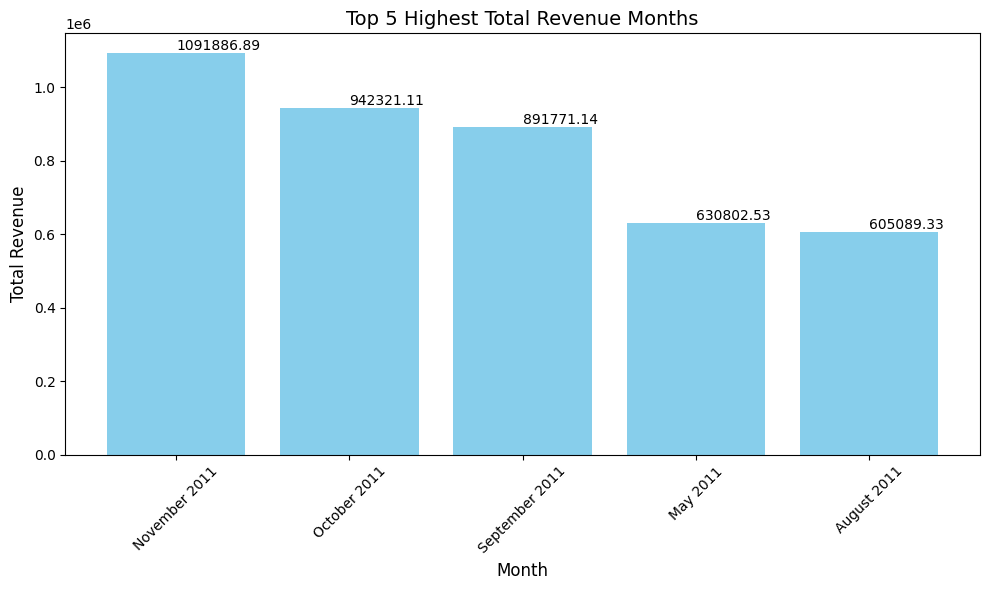

In [20]:
# # @title Top 5 Highest Total Revenue Months

# import matplotlib.pyplot as plt
# top_5_months = monthly_revenues.sort_values(by='Total Revenue', ascending=False).head()
# plt.bar(top_5_months['Month'], top_5_months['Total Revenue'])
# plt.xlabel('Month')
# _ = plt.ylabel('Total Revenue')

import matplotlib.pyplot as plt

# Sorting the data and selecting the top 5 months
top_5_months = monthly_revenues.sort_values(by='Total Revenue', ascending=False).head()

# Creating a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed for clarity
bars = plt.bar(top_5_months['Month'], top_5_months['Total Revenue'], color='skyblue')  # You can change the color for aesthetics

plt.xlabel('Month', fontsize=12)  # Adjust font size as needed
plt.ylabel('Total Revenue', fontsize=12)
plt.title('Top 5 Highest Total Revenue Months', fontsize=14)  # Adding a title with a larger font size

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
plt.show()


**3) Top 10 products**

In [21]:
#Grouping the rows
data_top10 = data.groupby('Description')

#Creating a pivot table that shows the 10 best selling items
data_top10 = pd.pivot_table(data,index=['Description'], values='Total', aggfunc=sum)
data_top10.sort_values('Total', ascending = False).head(10)

,Total
Description,
REGENCY CAKESTAND 3 TIER,132870.40
WHITE HANGING HEART T-LIGHT HOLDER,93823.85
JUMBO BAG RED RETROSPOT,83236.76
PARTY BUNTING,67687.53
POSTAGE,66710.24
ASSORTED COLOUR BIRD ORNAMENT,56499.22
RABBIT NIGHT LIGHT,51137.80
CHILLI LIGHTS,45936.81
PAPER CHAIN KIT 50'S CHRISTMAS,41500.48


**4) Top countries with maximum customers**

In [22]:
# Select the relevant columns
relevant_columns = ['Country', 'CustomerID']
country_customer_data = data[relevant_columns]

# Group by 'Country', count each 'CustomerID', and sort the counts in descending order
# Then select the top 10 countries with the most customers
top_countries_by_customer_count = country_customer_data.groupby('Country')['CustomerID']\
    .count()\
    .sort_values(ascending=False)\
    .head(10)

# Display the result
print(top_countries_by_customer_count)


Country
United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1480
Australia           1259
Name: CustomerID, dtype: int64


In [23]:
top_countries_by_customer_count

Country
United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1480
Australia           1259
Name: CustomerID, dtype: int64

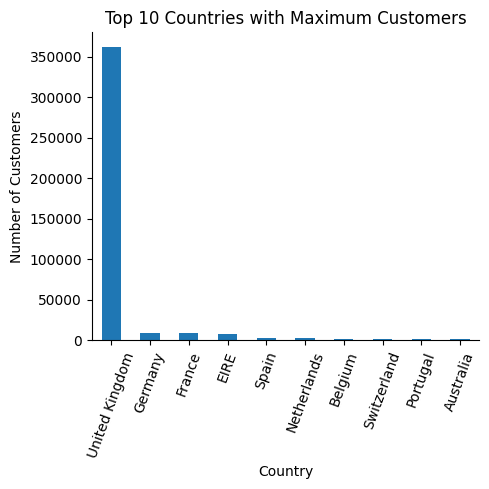

In [24]:
# prompt: plot  top_countries_by_customer_count

import matplotlib.pyplot as plt
# Create a bar chart of the top 10 countries with the most customers
top_countries_by_customer_count.plot(kind='bar', figsize=(5, 4), title='Top 10 Countries with Maximum Customers')
plt.gca().spines[['top', 'right']].set_visible(False)
# Rotate the x-axis labels for better readability
plt.xticks(rotation=70)
plt.xlabel('Country')
_ = plt.ylabel('Number of Customers')


**5) Most sold product**

In [25]:
# Calculate the frequency of each product's sale
product_sales_counts = data['StockCode'].value_counts()

# Identify the product(s) with the highest sales (most frequently occurring StockCode)
most_sold_products = data['StockCode'].mode()

# Iterate through the most sold products and display their sales frequency
for product in most_sold_products:
    sales_frequency = product_sales_counts[product]
    print(f"The most sold product, {product}, was sold {sales_frequency} times.")


The most sold product, 85123A, was sold 2077 times.


**6) Least sold product**

In [26]:
# Calculate the frequency of each product's sale
product_sales_counts = data['StockCode'].value_counts()

# Find the product with the minimum sales count
least_frequent_value = product_sales_counts.idxmin()
least_frequent_count = product_sales_counts.min()

# Display the least sold product and its sales frequency
print(f"The least sold product {least_frequent_value} was sold {least_frequent_count} times.")

The least sold product 84802A was sold 1 times.


**7) Sales Trend for the dataset**

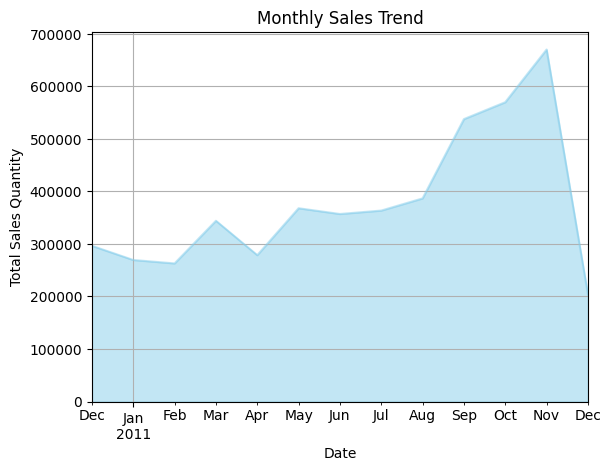

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the sales data by month and sum the quantities
monthly_sales = data.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Quantity'].sum()

# Plot the data using an area chart
monthly_sales.plot(kind='area', stacked=True, color='skyblue', alpha=0.5)
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.grid(True)  # Optional: adds a grid for better readability
plt.show()


**8) Country Wise distribution of Revenue**

<function matplotlib.pyplot.show(close=None, block=None)>

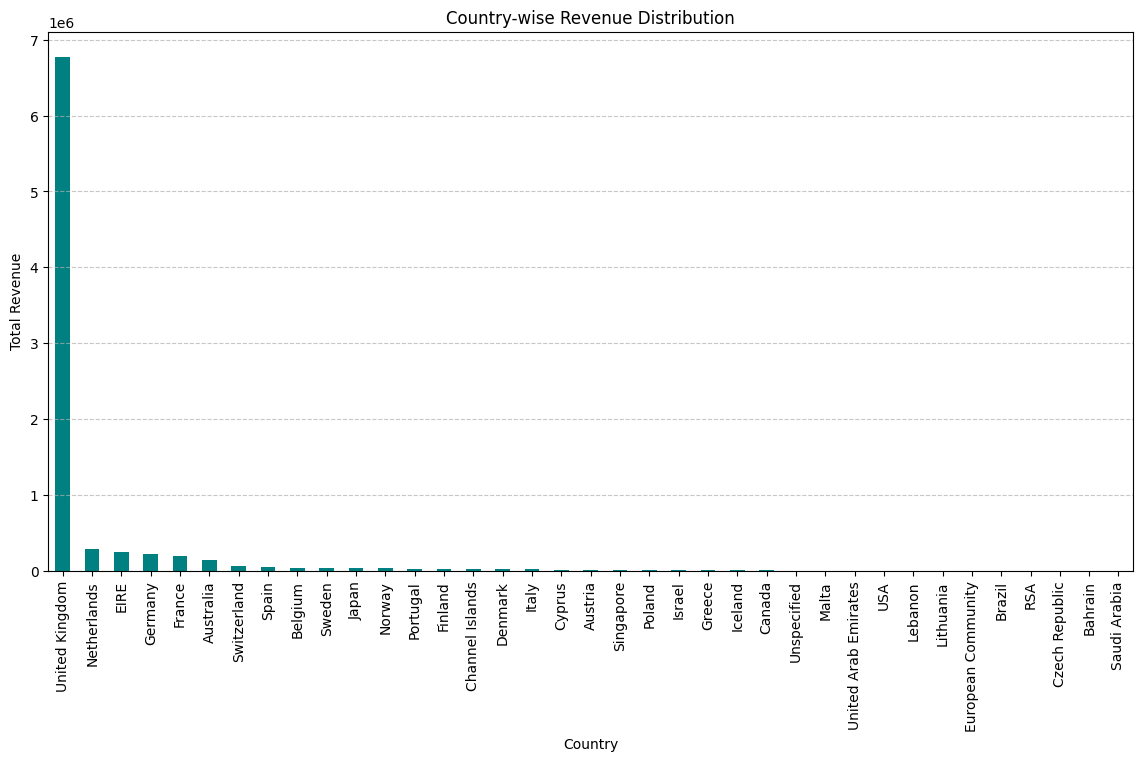

In [28]:
import matplotlib.pyplot as plt

# Assuming the dataset 'data' has a 'Revenue' column
# Group by 'Country' and sum the 'Revenue'
country_revenue = data.groupby('Country')['Revenue'].sum()

# Sort the revenues in descending order to better visualize in the chart
country_revenue_sorted = country_revenue.sort_values(ascending=False)

# Plot the data using a bar chart
country_revenue_sorted.plot(kind='bar', color='teal', figsize=(14, 7))
plt.title('Country-wise Revenue Distribution')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)  # Rotate the country names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid for easier comparison
plt.show
